In [1]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [2]:
with open('../../output/weights/p_date=2022-09-06-16_07_19/log.json', 'r') as f:
    data = json.load(f)

l = len(data["loss"])
print(f"{l} records")
print(data.keys())

36001 records
dict_keys(['loss', 'mean_q', 'mean_eps', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [3]:
slice = 50_000

# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-slice:]
mean_loss = stat.mean(loss)
loss_filtered = { k: v for k, v in enumerate(loss) }#if v <= mean_loss }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-slice:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ][-slice:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"][-slice:]) if str(v) != "nan" }

In [4]:
def plot(data, title, labelX, labelY):
    interval = 1000
    
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : stat.mean(list(data.values())[i:i+interval+1]) for i in range(0, len(data.values()), interval) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.title(title)
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(float(current)), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    print(f"Moving Average (simple): {moving_average}")
    print(f"Moving Average: {percent_list}")
   
    print(f"Minimum: {min(data.values())}")

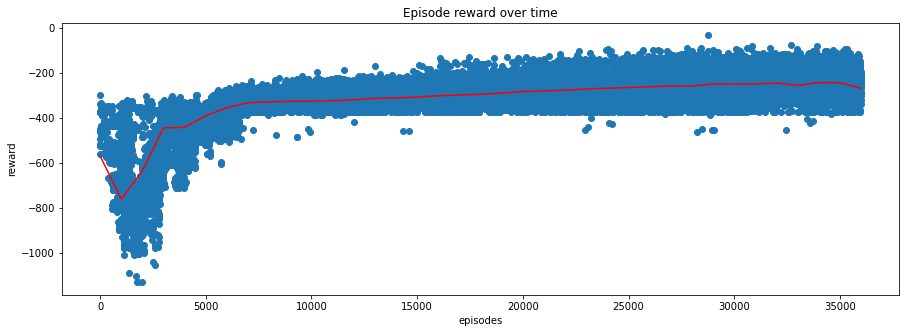

Maximum: -34.599999999999994
Average: -329.70356378988737
Moving Average (simple): {0: -570.2065934065934, 1000: -761.831968031968, 2000: -635.9076923076923, 3000: -445.81738261738263, 4000: -443.0027972027972, 5000: -391.7046953046953, 6000: -355.86753246753244, 7000: -333.6105894105894, 8000: -329.98741258741256, 9000: -327.2829170829171, 10000: -327.1036963036963, 11000: -324.5080919080919, 12000: -321.04935064935063, 13000: -314.3978021978022, 14000: -312.4785214785215, 15000: -308.54445554445556, 16000: -303.1478521478522, 17000: -299.22897102897105, 18000: -296.6957042957043, 19000: -290.7982017982018, 20000: -283.9068931068931, 21000: -281.5156843156843, 22000: -277.94885114885113, 23000: -272.77542457542455, 24000: -269.1808191808192, 25000: -266.384015984016, 26000: -262.7476523476523, 27000: -258.8917082917083, 28000: -259.6885114885115, 29000: -250.45854145854145, 30000: -250.65774225774226, 31000: -250.34685314685314, 32000: -246.1972027972028, 33000: -256.61738261738265, 3

In [5]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

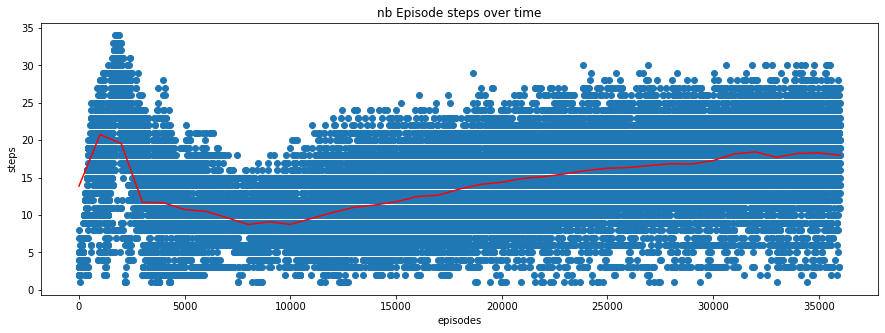

Maximum: 34
Average: 14.127607566456488
Moving Average (simple): {0: 13.867132867132867, 1000: 20.76123876123876, 2000: 19.53946053946054, 3000: 11.714285714285714, 4000: 11.640359640359641, 5000: 10.734265734265735, 6000: 10.493506493506494, 7000: 9.651348651348652, 8000: 8.742257742257742, 9000: 9.094905094905094, 10000: 8.765234765234766, 11000: 9.547452547452547, 12000: 10.34965034965035, 13000: 11.022977022977024, 14000: 11.345654345654346, 15000: 11.773226773226773, 16000: 12.475524475524475, 17000: 12.65034965034965, 18000: 13.472527472527473, 19000: 14.097902097902098, 20000: 14.385614385614385, 21000: 14.895104895104895, 22000: 15.126873126873127, 23000: 15.504495504495505, 24000: 15.951048951048952, 25000: 16.248751248751248, 26000: 16.345654345654346, 27000: 16.61938061938062, 28000: 16.853146853146853, 29000: 16.813186813186814, 30000: 17.282717282717282, 31000: 18.16083916083916, 32000: 18.43856143856144, 33000: 17.72027972027972, 34000: 18.22977022977023, 35000: 18.295704

In [6]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

In [7]:
# plot(loss_filtered, "Loss over time", "episodes", "loss")

In [8]:
#plot(mae_filtered, "Mae over time", "episodes", "mae")

In [9]:
#plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

In [10]:
#plot(duration, "Duration over time", "episodes", "duration")

In [11]:
#plot(accuracy, "accuracy over time", "accuracy", "steps")